In [1]:
!pip install tensorflow_addons

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import time
import tensorflow_addons as tfa

c:\Users\Welcome\anaconda3\envs\my_env\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Users\Welcome\anaconda3\envs\my_env\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.

In [3]:
print(tf.config.list_physical_devices('GPU'))
print("TensorFlow version:", tf.__version__)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow version: 2.10.1


In [4]:
import os
first_folder = r'D:\PlantDIsease\PDMD - RFS70'

def walk_through_dir(dir_path):
  count_images = 0
  for dirpath, dirnames, filenames in os.walk(dir_path):
    count_images += len(filenames)
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
  print(f"Total Images : {count_images}")
walk_through_dir(first_folder)

There are 3 directories and 0 images in 'D:\PlantDIsease\PDMD - RFS70'.
There are 88 directories and 0 images in 'D:\PlantDIsease\PDMD - RFS70\test'.
There are 0 directories and 63 images in 'D:\PlantDIsease\PDMD - RFS70\test\Apple__black_rot'.
There are 0 directories and 166 images in 'D:\PlantDIsease\PDMD - RFS70\test\Apple__healthy'.
There are 0 directories and 37 images in 'D:\PlantDIsease\PDMD - RFS70\test\Apple__rust'.
There are 0 directories and 71 images in 'D:\PlantDIsease\PDMD - RFS70\test\Apple__scab'.
There are 0 directories and 49 images in 'D:\PlantDIsease\PDMD - RFS70\test\Cassava__bacterial_blight'.
There are 0 directories and 57 images in 'D:\PlantDIsease\PDMD - RFS70\test\Cassava__brown_streak_disease'.
There are 0 directories and 48 images in 'D:\PlantDIsease\PDMD - RFS70\test\Cassava__green_mottle'.
There are 0 directories and 69 images in 'D:\PlantDIsease\PDMD - RFS70\test\Cassava__healthy'.
There are 0 directories and 46 images in 'D:\PlantDIsease\PDMD - RFS70\tes

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE =(256 , 256)
BATCH_SIZE=16

train_dir = r"D:\PlantDIsease\PDMD - RFS70/train/"
val_dir = r"D:\PlantDIsease\PDMD - RFS70/val/"
test_dir = r"D:\PlantDIsease\PDMD - RFS70/test/"

train_datagen = ImageDataGenerator( rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2,shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

print("Training images:")
train_data =train_datagen.flow_from_directory(train_dir ,
                                              target_size =IMAGE_SHAPE,
                                              batch_size = BATCH_SIZE,
                                              class_mode ="categorical",
                                              shuffle = True

                                              )
print("Training images:")
val_data =val_datagen.flow_from_directory(val_dir ,
                                              target_size =IMAGE_SHAPE,
                                              batch_size = BATCH_SIZE,
                                              class_mode ="categorical",
                                              shuffle = True)
print("Testing images:")
test_data =test_datagen.flow_from_directory(test_dir ,
                                              target_size =IMAGE_SHAPE,
                                              batch_size = 1,
                                              class_mode ="categorical",
                                              shuffle = False)

Training images:
Found 55321 images belonging to 88 classes.
Training images:
Found 15784 images belonging to 88 classes.
Testing images:
Found 7981 images belonging to 88 classes.


In [6]:
# Getting Class Names
# Define class labels
labels = test_data.class_indices.keys()
labels = list(labels)
class_names = labels
print(f"Class Names : {class_names}")

Class Names : ['Apple__black_rot', 'Apple__healthy', 'Apple__rust', 'Apple__scab', 'Cassava__bacterial_blight', 'Cassava__brown_streak_disease', 'Cassava__green_mottle', 'Cassava__healthy', 'Cassava__mosaic_disease', 'Cherry__healthy', 'Cherry__powdery_mildew', 'Chili__healthy', 'Chili__leaf curl', 'Chili__leaf spot', 'Chili__whitefly', 'Chili__yellowish', 'Coffee__cercospora_leaf_spot', 'Coffee__healthy', 'Coffee__red_spider_mite', 'Coffee__rust', 'Corn__common_rust', 'Corn__gray_leaf_spot', 'Corn__healthy', 'Corn__northern_leaf_blight', 'Cucumber__diseased', 'Cucumber__healthy', 'Gauva__diseased', 'Gauva__healthy', 'Grape__black_measles', 'Grape__black_rot', 'Grape__healthy', 'Grape__leaf_blight_(isariopsis_leaf_spot)', 'Jamun__diseased', 'Jamun__healthy', 'Lemon__diseased', 'Lemon__healthy', 'Mango__diseased', 'Mango__healthy', 'Peach__bacterial_spot', 'Peach__healthy', 'Pepper_bell__bacterial_spot', 'Pepper_bell__healthy', 'Pomegranate__diseased', 'Pomegranate__healthy', 'Potato__e

In [7]:

def create_tensorboard_callback(experiment_name, dir_name = r"D:\PlantDIsease\Model_Results\LogsDirectory"):
  """
  Creates a TensorBoard callback instand to store log files.

  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"

  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [8]:
import matplotlib.pyplot as plt

def plot_loss_curves(history , file_name , save_dir = r"D:\PlantDIsease\Model_Results\Accuracy_Curves"):
    # Get training and validation loss values
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get training and validation accuracy values
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    # Plot the loss curves
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot the accuracy curves
    plt.subplot(1, 2, 2)
    plt.plot(accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.savefig(os.path.join(save_dir ,file_name))
    plt.show()





In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix , classification_report
import seaborn as sns

def evaluate_multiclass(y_true, y_pred , labels):
    # Compute accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Compute precision
    precision = precision_score(y_true, y_pred, average='weighted')

    # Compute recall
    recall = recall_score(y_true, y_pred, average='weighted')

    report = classification_report(y_true, y_pred, output_dict=True)


    return accuracy, precision, recall , report

def plot_confusion_matrix(cm, labels, save_dir=r"D:\PlantDIsease\Model_Results\ConfusionMatrix"):
    fig, ax = plt.subplots(figsize=(10,10))
    cax = ax.matshow(cm, cmap='Blues')

    # Add color bar
    plt.colorbar(cax)

    # Set labels
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)

    # Rotate x-axis labels
    ax.xaxis.set_tick_params(rotation=45)

    # Set labels at ticks
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

    # Display values in each cell
    for i in range(len(labels)):
        for j in range(len(labels)):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center')

    # Save plot

    # Show plot
    plt.show()




In [10]:
def load_and_prep_image(filename, img_shape=224, scale=False):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.io.decode_image(img , channels=3)

  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

In [11]:
# # Make preds on a series of random images
# import os
# import random

# def Some_Predictions_on_Test_Data(test_dir , class_names , model , scale, save_dir =r"D:\PlantDIsease\Model_Results\Some_Predictions" ):
#         plt.figure(figsize=(17,10))
#         for i in range(6):
#           # Choose a random image from a random class
#           class_name = random.choice(class_names)
#           # filename = random.choice(os.listdir(test_dir + "/" + class_name))
#           # filepath = test_dir + class_name + "/" + filename

#           # Load the image and make predictions
#           img = load_and_prep_image(filepath, scale=True) # don't scale images for EfficientNet predictions
#           pred_prob = model.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
#           pred_class = class_names[pred_prob.argmax()] # find the predicted class


#           new_image = img

#           plt.subplot(3,2, i+1)
#           plt.imshow(new_image)
#           if class_name == pred_class: # Change the color of text based on whether prediction is right or wrong
#             title_color = "g"
#           else:
#             title_color = "r"
#           plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
#           plt.axis(False)
#         plt.savefig(os.path.join(save_dir , file_name))

In [12]:
def Ploting_Confusion_matrix( test_data , model, save_dir = r"D:\PlantDIsease\Model_Results\ConfusionMatrix"):
    # Example usage:
    # Generate example data

    y_true = test_data.classes
    pred_prob = model.predict(test_data)
    y_pred = pred_prob.argmax(axis = 1)
    # Define class labels
    labels = test_data.class_indices.keys()
    labels = list(labels)

    # Evaluate model
    accuracy, precision, recall , report  = evaluate_multiclass(y_true, y_pred , labels )

    # Print evaluation metrics
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    report = pd.DataFrame(report).transpose()


    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plot_confusion_matrix(cm, labels, save_dir)

    return accuracy , precision , recall

In [13]:
# import pandas as pd

# def append_row_to_dataframe(data, csv_filename):
#     """
#     Append a row to a DataFrame and save it to a CSV file.

#     Args:
#     - data: a dictionary where keys are column names and values are the corresponding values for the new row
#     - csv_filename: the filename for the CSV file to append the row
#     """
#     try:
#         df = pd.read_csv(csv_filename)
#     except FileNotFoundError:
#         print("CSV file not found.")
#         return
#     data = pd.DataFrame(data)
#     df = pd.concat([df,data])
#     print(df)
#     df.to_csv(csv_filename, index=False)




In [14]:

import tensorflow as tf
import time
from tensorflow.keras import layers, models, callbacks

from tensorflow.keras.applications.densenet import DenseNet121

def create_cnn_model(input_shape, num_classes):


    base_model = DenseNet121(input_shape = (256 ,256 , 3), include_top = False, weights = 'imagenet')
    base_model.trainable = True

    x = layers.Flatten()(base_model.output)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.3)(x)

    # Add a final softmax layer with 4 node for classification output
    x = layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.models.Model(base_model.input, x)
    return model

# Define input shape and number of classes
input_shape = (256, 256, 3)  # Example input shape for image data (height, width, channels)
num_classes = test_data.num_classes # Example number of classes

# Create the CNN model
model_eff = create_cnn_model(input_shape, num_classes)

# Compile the model
model_eff.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks
early_stopping = callbacks.EarlyStopping(monitor='val_accuracy', patience=30, restore_best_weights=True)
model_checkpoint = callbacks.ModelCheckpoint(filepath=r'D:\PlantDIsease\Model_Results\Model_checkpoints/model_dense_pdmd.h5', monitor='val_accuracy', save_best_only=True)
tensorboard_callback = create_tensorboard_callback(experiment_name="Model_dense_pdmd")
# Train the model with callbacks

# Start time
start_time = time.time()
history_eff = model_eff.fit(train_data,
                    epochs=50,
                    validation_data=val_data,
                    callbacks=[ model_checkpoint , tensorboard_callback , early_stopping])

# End time
end_time = time.time()
# Calculate total training time
training_time = end_time - start_time


# # Save training time to a file
# with open('Model_Results/training_time.txt', 'w') as file:
#     file.write(f"Total training time model 2: {training_time} seconds\n")

# Print model summary
model_eff.summary()
# model_eff.save('Model_Results/Models/Model_files/model_eff')

Saving TensorBoard log files to: D:\PlantDIsease\Model_Results\LogsDirectory/Model_dense_pdmd
Epoch 1/50
3458/3458 [==============================] - 2715s 779ms/step - loss: 0.7645 - accuracy: 0.7954 - val_loss: 1.6003 - val_accuracy: 0.8116
Epoch 2/50
3458/3458 [==============================] - 2326s 673ms/step - loss: 0.3776 - accuracy: 0.8869 - val_loss: 2.0552 - val_accuracy: 0.8545
Epoch 3/50
3458/3458 [==============================] - 2309s 668ms/step - loss: 0.3018 - accuracy: 0.9074 - val_loss: 1.1609 - val_accuracy: 0.8578
Epoch 4/50
3458/3458 [==============================] - 2381s 688ms/step - loss: 0.2765 - accuracy: 0.9174 - val_loss: 1.5227 - val_accuracy: 0.8587
Epoch 5/50
3458/3458 [==============================] - 2301s 665ms/step - loss: 0.2515 - accuracy: 0.9240 - val_loss: 1.6907 - val_accuracy: 0.8696
Epoch 6/50
3458/3458 [==============================] - 2254s 652ms/step - loss: 0.2266 - accuracy: 0.9305 - val_loss: 1.4545 - val_accuracy: 0.8682
Epoch 7/50
3

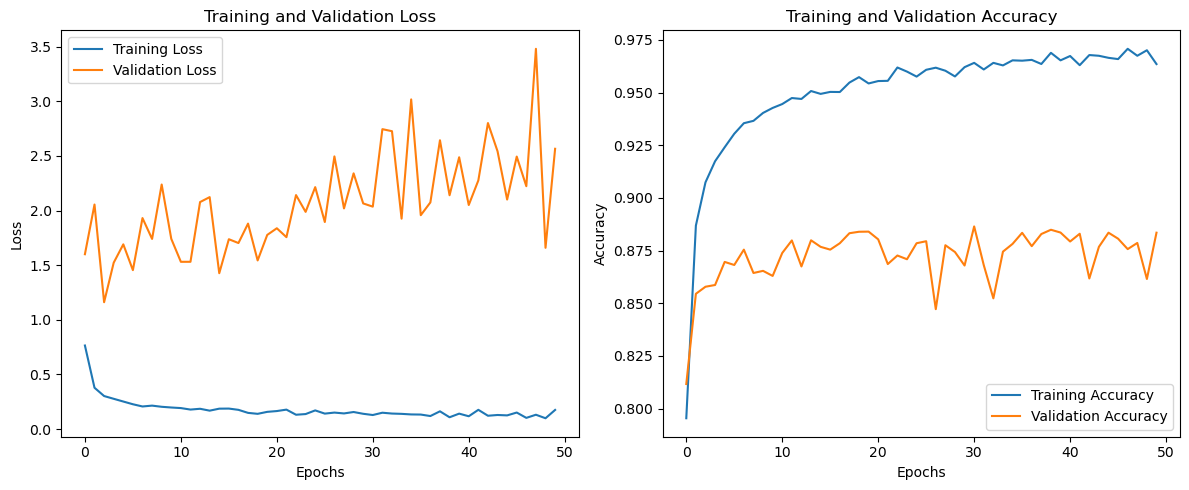

In [15]:
plot_loss_curves(history_eff , 'model_eff' )

In [16]:
# model_eff = tf.keras.models.load_model('Model_Results/Models/Model_files/model_eff')
# model_eff.load_weights('Model_Results/Model_checkpoints/model_eff.h5')


7981/7981 [==============================] - 523s 65ms/step
Accuracy: 0.93
Precision: 0.94
Recall: 0.93


C:\Users\Welcome\AppData\Local\Temp\ipykernel_14996\4229593298.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
C:\Users\Welcome\AppData\Local\Temp\ipykernel_14996\4229593298.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


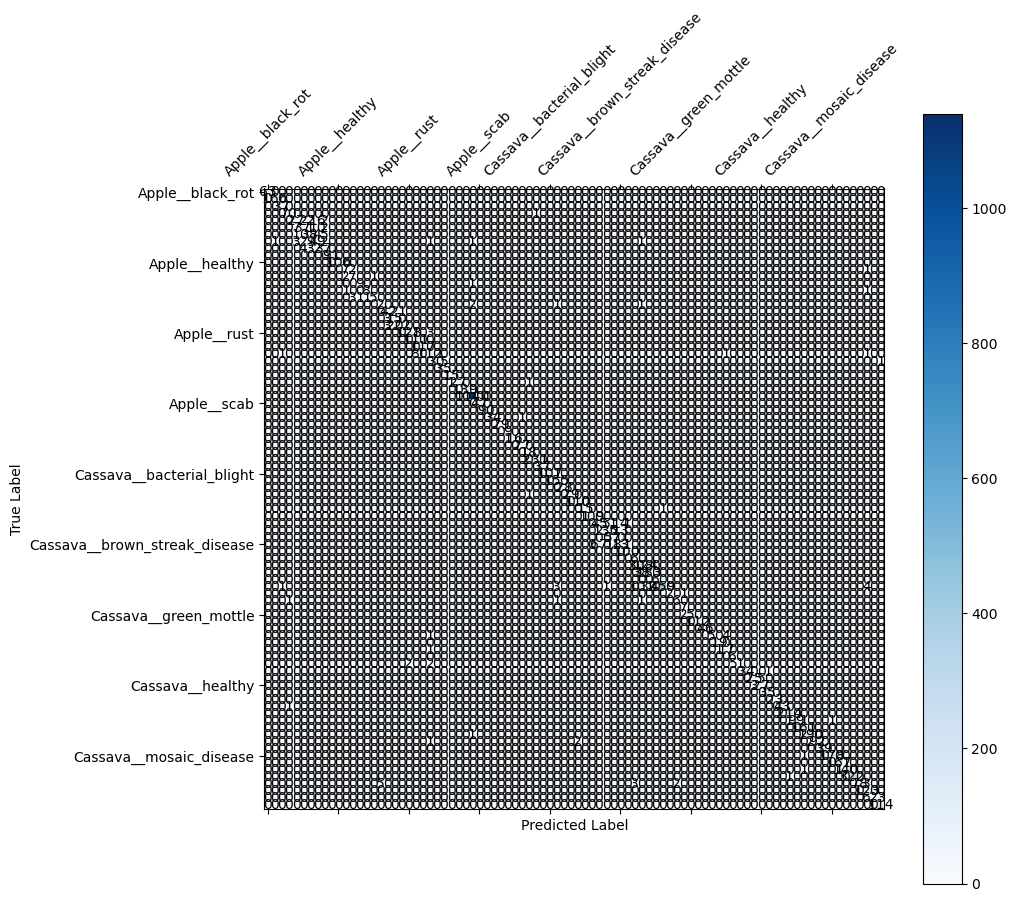

In [17]:
accuracy , precision , recall = Ploting_Confusion_matrix(test_data , model_eff )

In [18]:
# Some_Predictions_on_Test_Data(test_dir , class_names , model_eff , False ,'Model_eff' , save_dir ="Model_Results/Some_Predictions" )

In [19]:
# Example data to append
num_epochs_trained = len(history_eff.history['loss'])
new_row_data = {"Model_name": ["Model Efficient"], "accuracy": [accuracy], "precision":[ precision], "recall": [recall], "training_time": [training_time], "epochs": [num_epochs_trained]}

# # CSV filename
# csv_filename = "model_metrics.csv"

# # Append row to DataFrame and save to CSV
# append_row_to_dataframe(new_row_data, csv_filename)
